In [ ]:
# Import important libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer

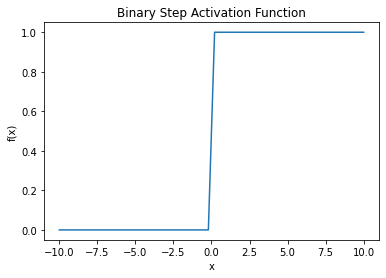

In [ ]:
# 1. Binary Step Activation Function
def binaryStep(x):
    return np.heaviside(x,1)

x = np.linspace(-10,10)
plt.plot(x,binaryStep(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Binary Step Activation Function')
plt.show()

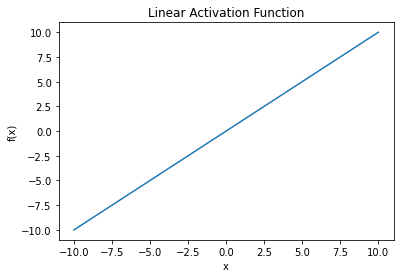

In [ ]:
# 2. Linear Activation Function
def linear(x):
    return x

x = np.linspace(-10,10)
plt.plot(x,linear(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Linear Activation Function')
plt.show()

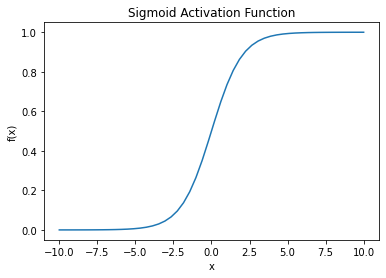

In [ ]:
# 3. Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10,10)
plt.plot(x,sigmoid(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sigmoid Activation Function')
plt.show()

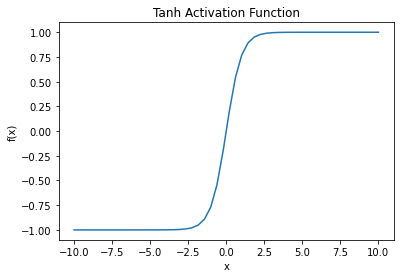

In [ ]:
# 4. Tanh Activation Function
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    # return np.tanh(x)

x = np.linspace(-10,10)
plt.plot(x,tanh(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Tanh Activation Function')
plt.show()

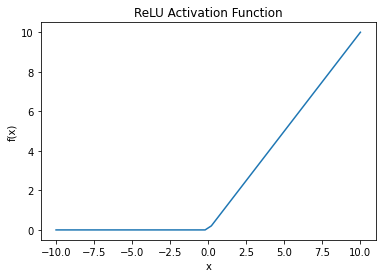

In [ ]:
# 5. ReLU Activation Function
def ReLU(x):
    return [max(0,value) for value in x]

x = np.linspace(-10,10)
plt.plot(x,ReLU(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('ReLU Activation Function')
plt.show()

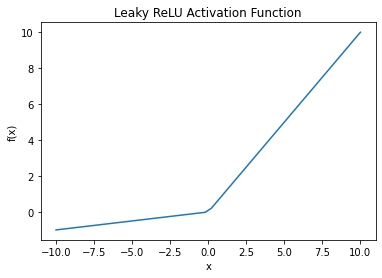

In [ ]:
# 6. Leaky ReLU Activation Function
def leakyReLU(x):
    return [max(0.1*i,i) for i in x]

x = np.linspace(-10,10)
plt.plot(x,leakyReLU(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Leaky ReLU Activation Function')
plt.show()

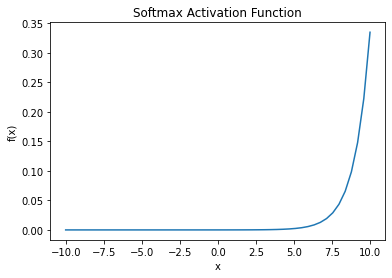

In [ ]:
# 7. Softmax Activation Function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

x = np.linspace(-10,10)
plt.plot(x,softmax(x))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Softmax Activation Function')
plt.show()

In [ ]:
def initialiseNetwork(num_features):
    W = np.zeros((num_features, 1))
    b = 0
    parameters = {"W": W, "b": b}
    return parameters

In [ ]:
def forwardPropagation(X, Y, parameters):
    W = parameters["W"]
    b = parameters["b"]
    Z = np.dot(W.T,X) + b
    A = sigmoid(Z)
    return A

In [ ]:
def cost(A, Y, num_samples):
    cost = -1/num_samples *np.sum(Y*np.log(A) + (1-Y)*(np.log(1-A)))
    return cost

In [ ]:
def backPropagration(X, Y, A, num_samples):
    dZ =   A - Y                        
    dW =  (np.dot(X,dZ.T))/num_samples                      
    db =    np.sum(dZ)/num_samples                          
    return dW, db

In [ ]:
def updateParameters(parameters, dW, db, learning_rate):
    W =  parameters["W"] - (learning_rate * dW)
    b =  parameters["b"] - (learning_rate * db)
    return {"W": W, "b": b}

In [ ]:
def model(X, Y, num_iter, learning_rate):
    num_features = X.shape[0]
    num_samples = X.shape[1]
    parameters = initialiseNetwork(num_features)                              #call initialiseNetwork()
    for i in range(num_iter):
      A = forwardPropagation(X, Y, parameters)                                # calculate final output A from forwardPropagation()
      if(i%100 == 0):
          print("cost after {} iteration: {}".format(i, cost(A, Y, num_samples)))
      dW, db = backPropagration(X, Y, A, num_samples)                         # calculate  derivatives from backpropagation
      parameters = updateParameters(parameters, dW, db, learning_rate)        # update parameters
    return parameters
    
    

In [ ]:
def predict(W, b, X):
    Z = np.dot(W.T,X) + b
    Y = np.array([1 if y > 0.5 else 0 for y in sigmoid(Z[0])]).reshape(1,len(Z[0]))
    return Y

In [ ]:
from sklearn.model_selection import train_test_split

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,random_state = 25)

In [ ]:
def normalize(data):
    col_max = np.max(data, axis = 0)
    col_min = np.min(data, axis = 0)
    return np.divide(data - col_min, col_max - col_min)

X_train_n = normalize(X_train)
X_test_n = normalize(X_test)

X_trainT = X_train_n.T
X_testT = X_test_n.T
y_trainT = y_train.reshape(1,X_train_n.T.shape[1])
y_testT =  y_test.reshape(1,X_testT.shape[1])

In [ ]:
#call the model() function with parametrs mentioned in the above cell
parameters = model(X_trainT, y_trainT, 4000, 0.75)

cost after 0 iteration: 0.6931471805599453
cost after 100 iteration: 0.24382767353051085
cost after 200 iteration: 0.18414919195134818
cost after 300 iteration: 0.1565873493485997
cost after 400 iteration: 0.1396752246321806
cost after 500 iteration: 0.1278729526958286
cost after 600 iteration: 0.1190088775113677
cost after 700 iteration: 0.11202667072700777
cost after 800 iteration: 0.10633924623930976
cost after 900 iteration: 0.10158933661241838
cost after 1000 iteration: 0.09754476494426205
cost after 1100 iteration: 0.09404694336475469
cost after 1200 iteration: 0.09098323338346236
cost after 1300 iteration: 0.08827107206470108
cost after 1400 iteration: 0.08584834873491792
cost after 1500 iteration: 0.0836673076013795
cost after 1600 iteration: 0.08169053991796828
cost after 1700 iteration: 0.07988826663984763
cost after 1800 iteration: 0.0782364464730404
cost after 1900 iteration: 0.07671542796224082
cost after 2000 iteration: 0.07530896965280097
cost after 2100 iteration: 0.074

In [ ]:
parameters

{'W': array([[-1.58455606],
        [-2.40924914],
        [-1.66149449],
        [-2.67137327],
        [ 0.7663745 ],
        [ 0.13736327],
        [-4.60035536],
        [-5.75816403],
        [-0.42539435],
        [ 3.91327216],
        [-3.26972938],
        [ 1.36829576],
        [-2.06525156],
        [-2.41978688],
        [-1.3430973 ],
        [ 2.70019395],
        [ 0.55199124],
        [ 1.17146685],
        [ 0.51217921],
        [ 1.88542175],
        [-5.18142462],
        [-5.40012744],
        [-4.48583887],
        [-4.59617795],
        [-3.34899524],
        [-1.20950225],
        [-3.67728035],
        [-5.02114259],
        [-3.11319132],
        [-0.20109589]]), 'b': 14.520237920116646}

In [ ]:
yPredTrain = predict(parameters['W'], parameters['b'], X_trainT )   # pass weigths and bias from parameters dictionary and X_trainT as input to the function
yPredTest = predict(parameters['W'], parameters['b'], X_testT)    # pass the same parameters but X_testT as input data

In [ ]:
accuracy_train = 100 - np.mean(np.abs(yPredTrain - y_trainT)) * 100
accuracy_test = 100 - np.mean(np.abs(yPredTest - y_testT)) * 100
print("train accuracy: {} %".format(accuracy_train))
print("test accuracy: {} %".format(accuracy_test))

train accuracy: 98.59154929577464 %
test accuracy: 93.00699300699301 %
